In [1]:
# Impoting required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.lines as mlines

# setting default option
pd.set_option("mode.copy_on_write", True)
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# loading the Datasets
mortality = pd.read_parquet("../../Data/processed/mortality_corrected.parquet")
shipment = pd.read_parquet("../../Data/processed/shipment_corrected.parquet")

In [3]:
mortality.sample(5)

,State,State_Code,County,County_Code,Year,Deaths,Population,Mortality_Rate
648,Arkansas,AR,WHITE,05145,2015,7,78954.0,0.000089
9278,Pennsylvania,PA,MONTGOMERY,42091,2010,84,800881.0,0.000105
9159,Pennsylvania,PA,LACKAWANNA,42069,2008,37,214044.0,0.000173
199,Alabama,AL,LIMESTONE,01083,2014,9,90622.0,0.000099
3569,Iowa,IA,STORY,19169,2006,4,84739.0,0.000047


In [4]:
shipment.sample(5)

,BUYER_STATE,BUYER_COUNTY,YEAR,MME,countyfips,Population
29242,OK,TULSA,2013,4.522252e+08,40143,623978
10575,IN,CRAWFORD,2014,2.499509e+06,18025,10669
26988,NY,WESTCHESTER,2013,2.197789e+08,36119,964713
27336,OH,FAIRFIELD,2011,6.009101e+07,39045,147180
296,AL,CULLMAN,2008,3.617508e+07,01043,80273


In [5]:
# Creating control variables

# Enter the Test State Below
test_state = "WA"

# Enter list of states required below, Included the test state
state_list = ["WA", "OR", "WI", "NJ"]

# Year control variable
policy_year = 2012  # year the policy was implemented
start_year = 2008  # desired start year for analysis
end_year = 2015  # desired end year for analysis

In [6]:
# subset the data
mortality = mortality[mortality["State_Code"].isin(state_list)]
mortality = mortality[
    (mortality["Year"] >= start_year) & (mortality["Year"] <= end_year)
]

In [7]:
# check number of times each county appears in the data
mortality["County_Code"].value_counts().value_counts()

count
8    86
Name: count, dtype: int64

In [8]:
# Add columns to tag the rows for pre-post policy implementation and test-control

# Tagging the rows for pre-post policy implementation
mortality["policy_implementation"] = mortality["Year"] >= policy_year

# Tagging the rows for test-control
mortality["State_Type"] = mortality["State_Code"].apply(
    lambda x: "Test" if x == test_state else "Control"
)

In [9]:
mortality.sample(5)

,State,State_Code,County,County_Code,Year,Deaths,Population,Mortality_Rate,policy_implementation,State_Type
8834,Oregon,OR,WASHINGTON,41067,2009,32,524699.0,0.000061,False,Control
12263,Wisconsin,WI,WASHINGTON,55131,2009,9,131579.0,0.000068,False,Control
12175,Wisconsin,WI,PORTAGE,55097,2012,9,70436.0,0.000128,True,Control
8705,Oregon,OR,DOUGLAS,41019,2010,9,107637.0,0.000084,False,Control
11610,Washington,WA,COWLITZ,53015,2015,15,103031.0,0.000146,True,Test


In [10]:
mortality_2 = (
    mortality.groupby(["State_Code", "Year", "policy_implementation"])
    .agg({"Mortality_Rate": "mean"})
    .reset_index()
)

In [11]:
mortality_2.sample(5)

,State_Code,Year,policy_implementation,Mortality_Rate
27,WI,2011,False,0.000111
6,NJ,2014,True,0.000132
21,WA,2013,True,0.000121
5,NJ,2013,True,0.000143
1,NJ,2009,False,0.000040


Text(-5.859374999999991, 0.5, 'Mortality Rate Per-Capita')

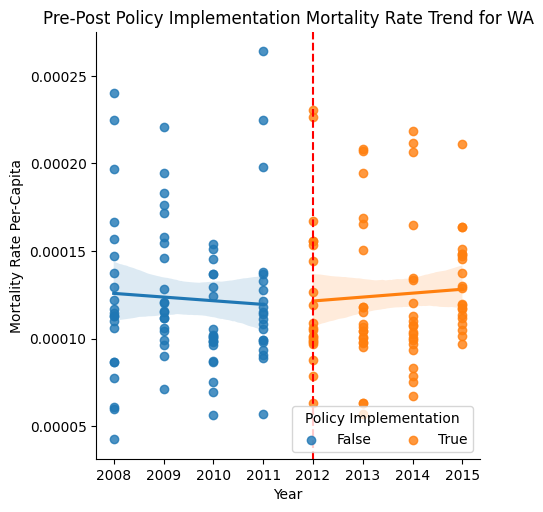

In [12]:
plot = sns.lmplot(
    data=mortality[mortality["State_Code"] == test_state],
    x="Year",
    y="Mortality_Rate",
    hue="policy_implementation",
    legend=False,
)
plot.set(title=f"Pre-Post Policy Implementation Mortality Rate Trend for {test_state}")

plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

ax = plot.axes[0, 0]

ax.axvline(policy_year, ls="--", color="red")
ax.set_ylabel("Mortality Rate Per-Capita")

Text(-5.984374999999991, 0.5, 'Mortality Rate Per-Capita')

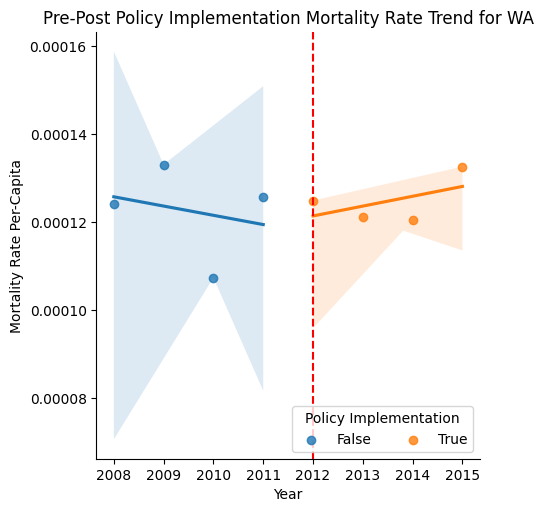

In [13]:
plot = sns.lmplot(
    data=mortality_2[mortality_2["State_Code"] == test_state],
    x="Year",
    y="Mortality_Rate",
    hue="policy_implementation",
    legend=False,
)
plot.set(title=f"Pre-Post Policy Implementation Mortality Rate Trend for {test_state}")

plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

ax = plot.axes[0, 0]

ax.axvline(policy_year, ls="--", color="red")
ax.set_ylabel("Mortality Rate Per-Capita")

Text(-26.109374999999993, 0.5, 'Mortality Rate Per-Capita')

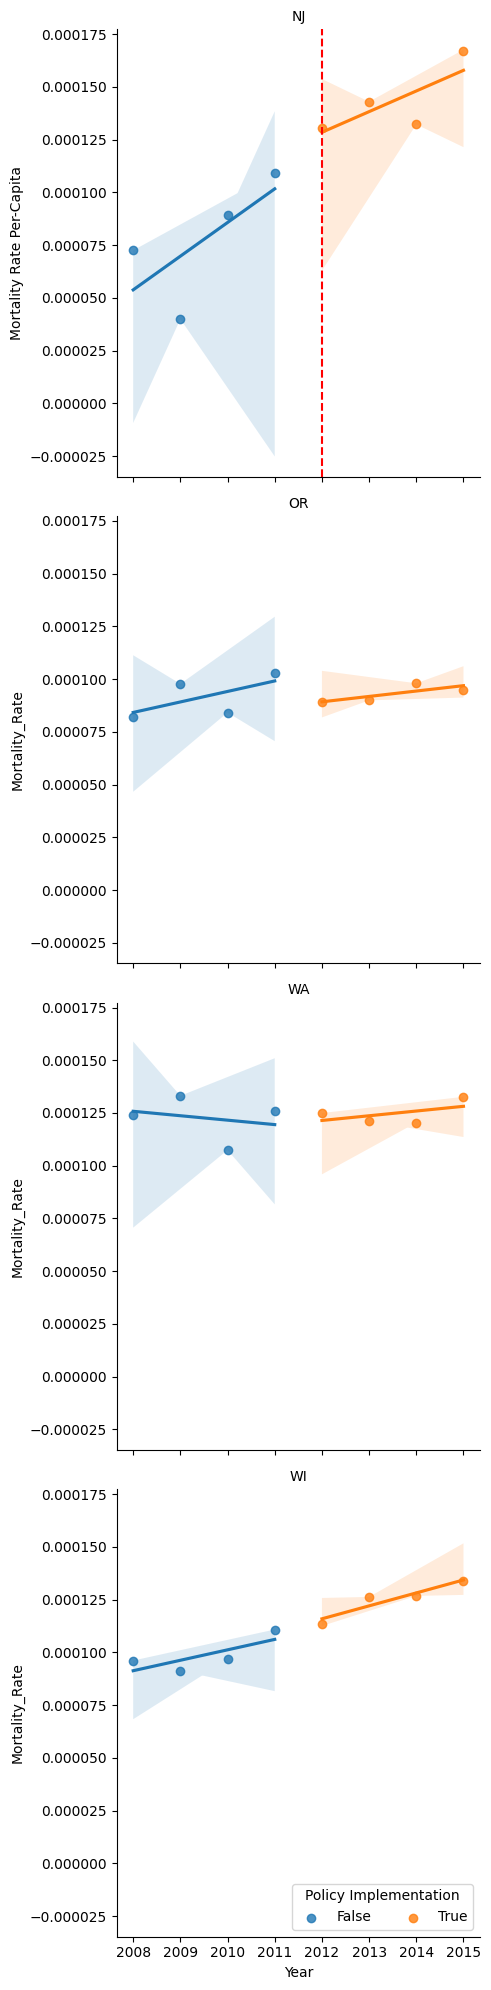

In [14]:
plot = sns.lmplot(
    data=mortality_2,
    x="Year",
    y="Mortality_Rate",
    hue="policy_implementation",
    legend=False,
    row="State_Code",
)

# Set titles for each subplot
plot = plot.set_titles("{row_name}")

plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

ax = plot.axes[0, 0]

ax.axvline(policy_year, ls="--", color="red")
ax.set_ylabel("Mortality Rate Per-Capita")

Text(-5.859374999999991, 0.5, 'Mortality Rate Per-Capita')

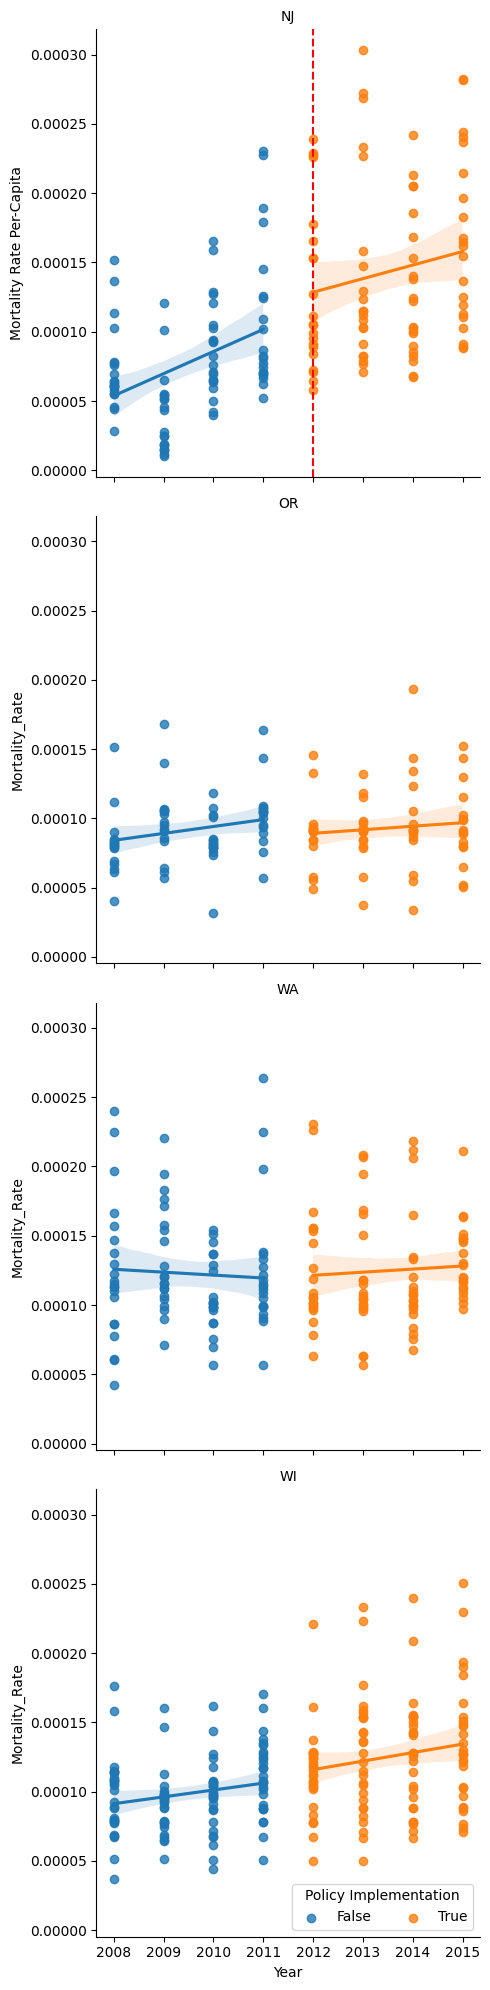

In [15]:
plot = sns.lmplot(
    data=mortality,
    x="Year",
    y="Mortality_Rate",
    hue="policy_implementation",
    legend=False,
    row="State_Code",
)

# Set titles for each subplot
plot = plot.set_titles("{row_name}")

plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

ax = plot.axes[0, 0]

ax.axvline(policy_year, ls="--", color="red")
ax.set_ylabel("Mortality Rate Per-Capita")

In [16]:
mortality_3 = (
    mortality.groupby(["State_Type", "Year", "policy_implementation"])
    .agg({"Mortality_Rate": "mean"})
    .reset_index()
)
mortality_3.sample(5)

,State_Type,Year,policy_implementation,Mortality_Rate
2,Control,2010,False,0.000091
15,Test,2015,True,0.000133
14,Test,2014,True,0.000120
3,Control,2011,False,0.000108
9,Test,2009,False,0.000133


In [17]:
mortality_3["hue_separator"] = (
    mortality_3["State_Type"]
    + " State-"
    + mortality_3["policy_implementation"].astype(str)
)

# Unify the color on the legend

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


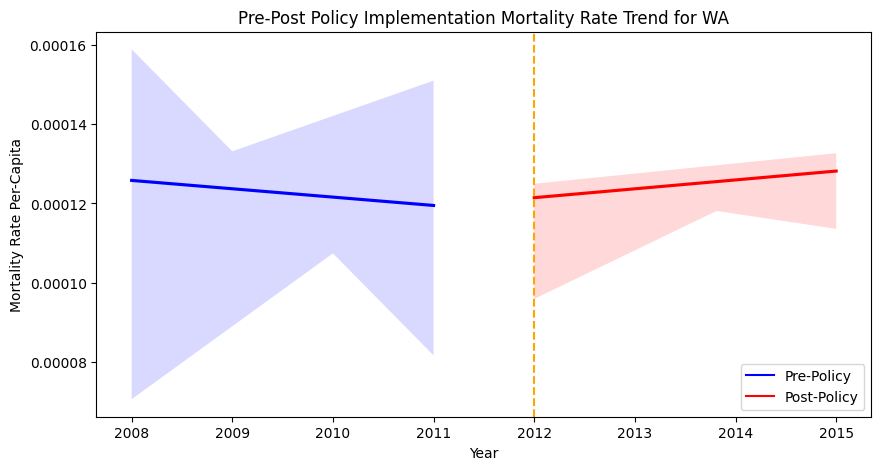

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plotting the pre-post graph
color = "red"
sns.regplot(
    data=mortality_2[
        (mortality_2["State_Code"] == test_state)
        & (mortality_2["policy_implementation"] == True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

# plotting the pre-post graph
color = "blue"
sns.regplot(
    data=mortality_2[
        (mortality_2["State_Code"] == test_state)
        & (mortality_2["policy_implementation"] != True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

# adding legends
plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

# addding vertical line
ax.axvline(policy_year, ls="--", color="orange")

# creating custom legend handles
blue_line = mlines.Line2D([], [], color="blue", label="Pre-Policy")
red_line = mlines.Line2D([], [], color="red", label="Post-Policy")

# adding legends
plt.legend(handles=[blue_line, red_line], loc="lower right")
plt.title(f"Pre-Post Policy Implementation Mortality Rate Trend for {test_state}")
plt.ylabel("Mortality Rate Per-Capita")

plt.savefig(f"../../Plots/{test_state}_pp_mortality.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


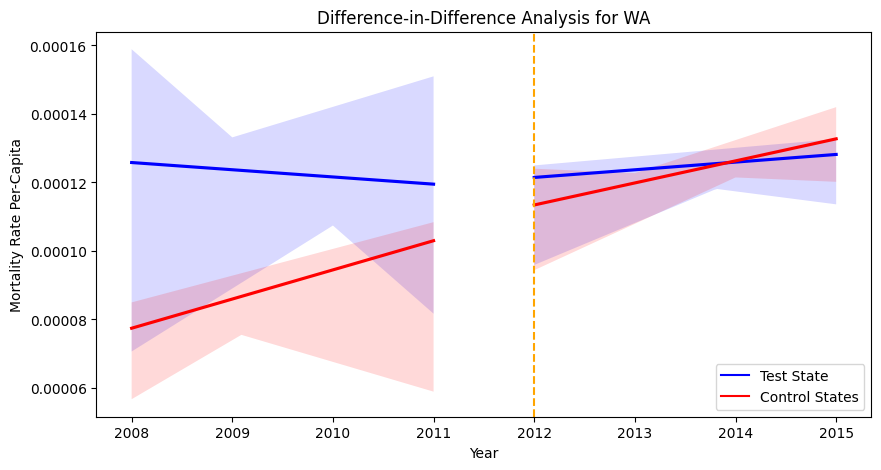

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plotting for test state
color = "blue"
sns.regplot(
    data=mortality_3[
        (mortality_3["State_Type"] == "Test")
        & (mortality_3["policy_implementation"] == True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

sns.regplot(
    data=mortality_3[
        (mortality_3["State_Type"] == "Test")
        & (mortality_3["policy_implementation"] != True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

# plotting for control states
color = "red"
sns.regplot(
    data=mortality_3[
        (mortality_3["State_Type"] == "Control")
        & (mortality_3["policy_implementation"] == True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

sns.regplot(
    data=mortality_3[
        (mortality_3["State_Type"] == "Control")
        & (mortality_3["policy_implementation"] != True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)
# adding legends
plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

# addding vertical line
ax.axvline(policy_year, ls="--", color="orange")

# creating custom legend handles
blue_line = mlines.Line2D([], [], color="blue", label="Test State")
red_line = mlines.Line2D([], [], color="red", label="Control States")

# adding legends
plt.legend(handles=[blue_line, red_line], loc="lower right")
plt.title(f"Difference-in-Difference Analysis for {test_state}")
plt.ylabel("Mortality Rate Per-Capita")

plt.savefig(f"../../Plots/{test_state}_did_mortality.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


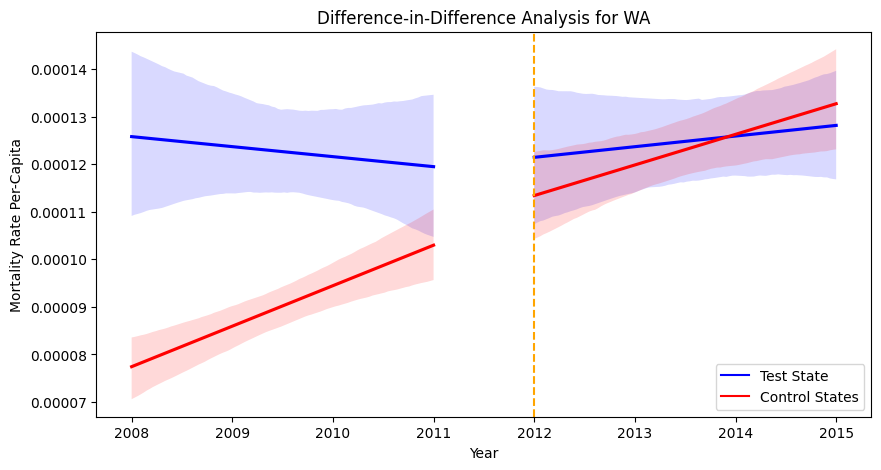

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plotting for test state
color = "blue"
sns.regplot(
    data=mortality[
        (mortality["State_Type"] == "Test")
        & (mortality["policy_implementation"] == True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

sns.regplot(
    data=mortality[
        (mortality["State_Type"] == "Test")
        & (mortality["policy_implementation"] != True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

# plotting for control states
color = "red"
sns.regplot(
    data=mortality[
        (mortality["State_Type"] == "Control")
        & (mortality["policy_implementation"] == True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)

sns.regplot(
    data=mortality[
        (mortality["State_Type"] == "Control")
        & (mortality["policy_implementation"] != True)
    ],
    x="Year",
    y="Mortality_Rate",
    line_kws={"color": color},
    ax=ax,
    scatter=False,
)
# adding legends
plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

# addding vertical line
ax.axvline(policy_year, ls="--", color="orange")

# creating custom legend handles
blue_line = mlines.Line2D([], [], color="blue", label="Test State")
red_line = mlines.Line2D([], [], color="red", label="Control States")

# adding legends
plt.legend(handles=[blue_line, red_line], loc="lower right")
plt.title(f"Difference-in-Difference Analysis for {test_state}")
plt.ylabel("Mortality Rate Per-Capita")

plt.savefig(f"../../Plots/{test_state}_did_mortality.png")

In [ ]:
# Creating control variables

# Enter the Test State Below
test_state = "FL"

# Enter list of states required below, Included the test state
state_list = ["FL", "NC", "LA", "GA"]

# Year control variable
policy_year = 2012  # year the policy was implemented
start_year = 2008  # desired start year for analysis
end_year = 2015  # desired end year for analysis